In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data
df = pd.read_csv("creditcard.csv")

In [3]:
# display the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# calculate the % of fraud
classes = df['Class'].value_counts()
normal_share = classes[0]/len(df['Class'])*100
fraud_share = classes[1]/len(df['Class'])*100

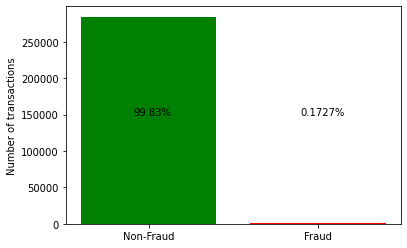

In [6]:
# plotting % fraud
plt.bar(['Non-Fraud','Fraud'], classes, color=['g','r'])
plt.ylabel('Number of transactions')
plt.annotate("{0:.4}%".format(normal_share),(0.2, 0.5), xycoords='axes fraction')
plt.annotate("{0:.4}%".format(fraud_share),(0.7, 0.5), xycoords='axes fraction')
plt.show()

In [7]:
# drop the Time column

df.drop('Time', axis=1, inplace=True)

We drop the Time column since it does not provide any insight as it is just time from the 1st transaction in the data set.

In [8]:
y = df['Class']
X = df.drop('Class', axis=1)

## Split data into train and test

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=21)

# Model building

In [10]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

### Logistic Regression with imbalance data

In [11]:
# logistic regression
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression(random_state = 21)

params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}


logistic_model = GridSearchCV(estimator=logistic_clf, 
                              param_grid=params, 
                              n_jobs=-1, 
                              cv=3, 
                              scoring='roc_auc', 
                              verbose=1)

In [12]:
# fit the model
logistic_model.fit(x_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=21), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             scoring='roc_auc', verbose=1)

In [13]:
logistic_cv = pd.DataFrame(logistic_model.cv_results_)
logistic_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.081835,0.129849,0.058005,0.004241,0.001,{'C': 0.001},0.983947,0.980332,0.984888,0.983056,0.001964,1
1,5.878163,0.090267,0.059679,0.005551,0.01,{'C': 0.01},0.978500,0.979696,0.985747,0.981314,0.003172,2
2,5.876498,0.325253,0.060212,0.004236,0.1,{'C': 0.1},0.952480,0.968933,0.928313,0.949909,0.016683,4
3,5.824281,0.163174,0.056532,0.004950,1.0,{'C': 1.0},0.958280,0.959118,0.937411,0.951603,0.010041,3
4,5.782426,0.202301,0.060010,0.004543,10.0,{'C': 10.0},0.947979,0.958682,0.931805,0.946155,0.011048,6
5,4.807000,0.827768,0.046216,0.005830,100.0,{'C': 100.0},0.957391,0.957923,0.932957,0.949424,0.011646,5
6,4.177543,0.110828,0.032520,0.003910,1000.0,{'C': 1000.0},0.950472,0.952350,0.935091,0.945971,0.007731,7


In [14]:
# best params
print('Best C:',logistic_model.best_params_, 'Best score:', logistic_model.best_score_)

Best C: {'C': 0.001} Best score: 0.9830555398738171


### Random Forest with imbalance data

In [15]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=21)

params = { 
    'n_estimators': range(800, 1000, 25)
}

rf_model = GridSearchCV(estimator=rf_clf, 
                              param_grid=params, 
                              n_jobs=-1, 
                              cv=3, 
                              scoring='roc_auc', 
                              verbose=1)

In [16]:
rf_model.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=21), n_jobs=-1,
             param_grid={'n_estimators': range(800, 1000, 25)},
             scoring='roc_auc', verbose=1)

In [17]:
rf_cv = pd.DataFrame(rf_model.cv_results_)
rf_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1390.870162,31.024203,8.286236,0.311386,800,{'n_estimators': 800},0.941883,0.949289,0.979099,0.956757,0.016085,6
1,1439.848358,46.303473,8.449965,0.203309,825,{'n_estimators': 825},0.941790,0.949155,0.979008,0.956651,0.016092,7
2,1481.550199,37.956482,8.873319,0.314168,850,{'n_estimators': 850},0.941726,0.949058,0.978915,0.956566,0.016084,8
3,1521.572589,41.192317,10.143947,0.235471,875,{'n_estimators': 875},0.945532,0.952879,0.978922,0.959111,0.014326,5
4,1596.480062,37.459927,10.449423,1.202968,900,{'n_estimators': 900},0.949426,0.956660,0.978826,0.961638,0.012508,1
5,1760.557189,105.352280,10.497409,0.711063,925,{'n_estimators': 925},0.949339,0.956542,0.978849,0.961577,0.012562,2
6,1806.844435,6.721238,8.288774,0.450208,950,{'n_estimators': 950},0.949246,0.956434,0.978766,0.961482,0.012569,3
7,1813.741253,43.524757,6.883639,0.193804,975,{'n_estimators': 975},0.949168,0.956353,0.978674,0.961398,0.012563,4


In [18]:
# best params
print('Best C:',rf_model.best_params_, 'Best score:', rf_model.best_score_)

Best C: {'n_estimators': 900} Best score: 0.9616376272828718


### XGBoost with imbalance data

In [19]:
# XGBoost
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(max_depth=2, random_state = 21)

params = {'learning_rate': [0.1, 0.2, 0.3],
         'n_estimators': [1000, 1100]}

xgb_model = GridSearchCV(estimator=xgb_clf, 
                              param_grid=params, 
                              n_jobs=-1, 
                              cv=3, 
                              scoring='roc_auc', 
                              verbose=1)

In [20]:
xgb_model.fit(x_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[23:16:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=21,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, vali

In [21]:
xgb_cv = pd.DataFrame(xgb_model.cv_results_)
xgb_cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,531.890347,36.478703,0.422012,0.011202,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.973107,0.974160,0.977946,0.975071,0.002078,1
1,586.452870,40.956964,0.527289,0.074200,0.1,1100,"{'learning_rate': 0.1, 'n_estimators': 1100}",0.972498,0.974714,0.977790,0.975001,0.002170,2
2,474.530606,7.342274,0.457040,0.042131,0.2,1000,"{'learning_rate': 0.2, 'n_estimators': 1000}",0.970586,0.973681,0.975356,0.973208,0.001976,6
3,514.087442,6.190605,0.558208,0.033032,0.2,1100,"{'learning_rate': 0.2, 'n_estimators': 1100}",0.970820,0.974032,0.974853,0.973235,0.001740,5
4,444.184986,17.577493,0.396198,0.039300,0.3,1000,"{'learning_rate': 0.3, 'n_estimators': 1000}",0.970262,0.975201,0.978739,0.974734,0.003476,3
5,258.646256,117.754579,0.241265,0.051098,0.3,1100,"{'learning_rate': 0.3, 'n_estimators': 1100}",0.970149,0.975213,0.978660,0.974674,0.003495,4


In [22]:
# best params
print('Best C:',xgb_model.best_params_, 'Best score:', xgb_model.best_score_)

Best C: {'learning_rate': 0.1, 'n_estimators': 1000} Best score: 0.9750712235644278


From the above 3 model we can see that logistic regression has the best ROC AUC with 0.9830.

In [25]:
# predict on test data
from sklearn.metrics import roc_auc_score

# logistic regression
logistic_test_score = roc_auc_score(y_test,logistic_model.predict_proba(x_test)[:, 1])
logistic_test_score

0.9820901214119135

In [26]:
# random forest
rf_test_score = roc_auc_score(y_test,rf_model.predict_proba(x_test)[:, 1])
rf_test_score

0.9757653713370799

In [27]:
# xgboost
xgb_test_score = roc_auc_score(y_test,xgb_model.predict_proba(x_test)[:, 1])
xgb_test_score

0.9832964969585541

## Model building with balancing Classes

In [36]:
# balancing the dataset using smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=21)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print(np.sum(y_train))
print(np.sum(y_train_smote))

369
213236


In [66]:
# % of Fraud rows
print(100*(np.sum(y_train_smote)/len(y_train_smote)))

50.0


### Logistic Regression with balanced data

In [37]:
#logistic regression

logistic_clf_smote = LogisticRegression(random_state = 21)

params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}


logistic_model_smote = GridSearchCV(estimator=logistic_clf_smote, 
                              param_grid=params, 
                              n_jobs=-1, 
                              cv=3, 
                              scoring='roc_auc', 
                              verbose=1)

In [38]:
logistic_model_smote.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=21), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]},
             scoring='roc_auc', verbose=1)

In [39]:
logistic_cv_smote = pd.DataFrame(logistic_model_smote.cv_results_)
logistic_cv_smote

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,11.416516,0.531453,0.115969,0.015035,0.001,{'C': 0.001},0.992387,0.992705,0.992230,0.992441,0.000198,4
1,10.583195,0.614831,0.119118,0.005258,0.01,{'C': 0.01},0.992411,0.992641,0.992577,0.992543,0.000097,1
2,9.986772,0.204291,0.125656,0.007583,0.1,{'C': 0.1},0.992067,0.992551,0.992356,0.992325,0.000199,6
3,10.609098,0.409860,0.114005,0.010987,1.0,{'C': 1.0},0.992325,0.992335,0.992428,0.992363,0.000046,5
4,11.143300,0.148325,0.123179,0.009358,10.0,{'C': 10.0},0.992541,0.992792,0.992184,0.992506,0.000250,2
5,9.191623,1.362498,0.085496,0.007251,100.0,{'C': 100.0},0.992270,0.992439,0.992086,0.992265,0.000144,7
6,7.876444,0.374485,0.068096,0.015348,1000.0,{'C': 1000.0},0.992457,0.992321,0.992613,0.992464,0.000119,3


In [40]:
# best params
print('Best C:',logistic_model_smote.best_params_, 'Best score:', logistic_model_smote.best_score_)

Best C: {'C': 0.01} Best score: 0.9925433825281628


### Random Forest

In [44]:
# Random Forest

rf_clf_smote = RandomForestClassifier(random_state=21)

params = { 
    'n_estimators': [900, 1000]
}

rf_model_smote = GridSearchCV(estimator=rf_clf_smote, 
                              param_grid=params, 
                              n_jobs=-1, 
                              cv=3, 
                              scoring='roc_auc', 
                              verbose=1)

In [45]:
rf_model_smote.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=21), n_jobs=-1,
             param_grid={'n_estimators': [900, 1000]}, scoring='roc_auc',
             verbose=1)

In [46]:
rf_cv_smote = pd.DataFrame(rf_model_smote.cv_results_)
rf_cv_smote

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,2717.010131,4.439747,23.535657,0.587914,900,{'n_estimators': 900},0.999999,0.999998,0.999998,0.999998,4.557029e-07,2
1,2960.386189,4.222565,20.932640,0.240322,1000,{'n_estimators': 1000},0.999999,0.999998,0.999998,0.999998,4.116611e-07,1


In [47]:
# best params
print('Best C:',rf_model_smote.best_params_, 'Best score:', rf_model_smote.best_score_)

Best C: {'n_estimators': 1000} Best score: 0.9999982358078827


### XGBoost

In [50]:
# XGBoost

xgb_clf_smote = XGBClassifier(max_depth=2, random_state = 21, tree_method = 'gpu_hist')

params = {'learning_rate': [0.1, 0.2, 0.3],
         'n_estimators': [1000]}

xgb_model_smote = GridSearchCV(estimator=xgb_clf_smote, 
                              param_grid=params, 
                              n_jobs=-1, 
                              cv=3, 
                              scoring='roc_auc', 
                              verbose=1)

In [51]:
xgb_model_smote.fit(x_train_smote, y_train_smote)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[22:47:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=21,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method='gpu_hist'

In [52]:
xgb_cv_smote = pd.DataFrame(xgb_model_smote.cv_results_)
xgb_cv_smote

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,54.275985,1.434978,1.165062,0.328376,0.1,1000,"{'learning_rate': 0.1, 'n_estimators': 1000}",0.999961,0.999956,0.999956,0.999958,0.000002,3
1,54.985056,0.736854,0.910391,0.225451,0.2,1000,"{'learning_rate': 0.2, 'n_estimators': 1000}",0.999983,0.999980,0.999986,0.999983,0.000002,2
2,37.305559,20.633978,1.166847,0.564290,0.3,1000,"{'learning_rate': 0.3, 'n_estimators': 1000}",0.999986,0.999983,0.999991,0.999987,0.000003,1


In [53]:
# best params
print('Best C:',xgb_model_smote.best_params_, 'Best score:', xgb_model_smote.best_score_)

Best C: {'learning_rate': 0.3, 'n_estimators': 1000} Best score: 0.9999865042364462


As we can see after using a balanced data the ROC AUC score imporves

In [54]:
# predict on test data

# logistic regression
logistic_test_score_smote = roc_auc_score(y_test,logistic_model_smote.predict_proba(x_test)[:, 1])
logistic_test_score_smote

0.9806012249967602

In [55]:
# random forest
rf_test_score_smote = roc_auc_score(y_test,rf_model_smote.predict_proba(x_test)[:, 1])
rf_test_score_smote

0.9872519034986492

In [56]:
# xgboost
xgb_test_score_smote = roc_auc_score(y_test,xgb_model_smote.predict_proba(x_test)[:, 1])
xgb_test_score_smote

0.9809216059492717

SMOTE with Random Forest gives the best ROC AUC score of 98.72 on the test data.

In [63]:
# find out the threshold
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_smote,rf_model_smote.predict_proba(x_train_smote)[:, 1])

In [64]:
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

0.889


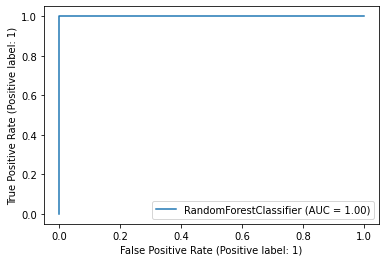

In [65]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf_model_smote.best_estimator_, x_train_smote, y_train_smote)